In [112]:
 #importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,svm
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
#importing dataset
iris = datasets.load_iris()


X = iris.data[:,:2] #we will be taking only first two rows to make visualizations 2D
y = iris.target # X will be the data to give input and y will be the actual answers for X input

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


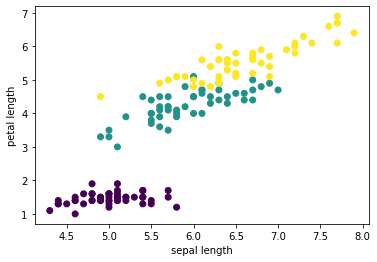

In [122]:
c=iris['target']
plt.scatter(sepal_length,pedal_length,c=c)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()


In [123]:
sepal_length=iris['data'][:,0]
pedal_length=iris['data'][:,2]


In [125]:
print("y:",y) #targets
print("X:",X) #data

y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
X: [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  

In [133]:
# Model declaration and fitting : 
#model = svm.SVC(kernel = "kernel name",gamma(for rbf) = ,degree(for poly) = , C=C)

iris=datasets.load_iris()
X=iris.data[:,:2]
y=iris.target
C = 1 # regularization factor

# instanciate SVM with kernel rbf with gamma 
rbf_svc = svm.SVC(kernel='rbf',gamma=0.5,C=C).fit(X,y)

# instanciate SVM with kernel poly with degree = 3 
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,y) 


In [134]:
# Model fitting
rbf_svc.fit(X,y)
poly_svc.fit(X,y)

# storing the models for the function below
models = [rbf_svc, poly_svc]

In [135]:
def plot_graph(clf): # clf is the model
    
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    titles = ['SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

    if clf in models:
        k = models.index(clf)
    
    else:
        print("data not found")
        return
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    color = plt.cm.Set1
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=color, alpha=0.6)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=color , s = 30)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[k])
    plt.show()

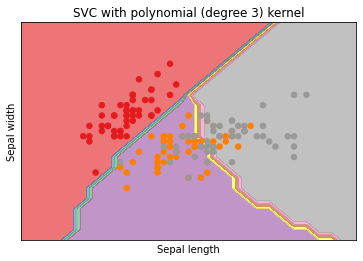

In [138]:
plot_graph(poly_svc) # shows graph for svm classification of svm with poly kernel

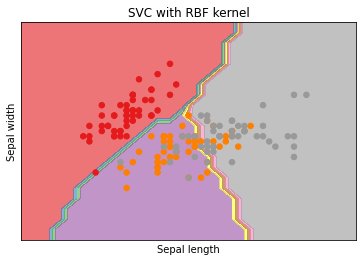

In [139]:
plot_graph(rbf_svc)  # shows graph for svm classification of svm with rbf kernel